In [5]:
# Setup and dependencies

import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

In [6]:
# Let's read in our csv

DF = pd.read_csv("Resources/fantasy_merged_7_17.csv")
MainDF = DF.fillna(0)
MainDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [7]:
# Colors for plots

orange = "#fb7b50"
blue = "#50d0fb"

1. Which season had the most fantasy total points?

In [8]:
# Create series by using group_by

fantasy_total_points_per_year = MainDF.groupby(by = "Year").sum()["PPR"]

# Create a dataframe

FantasyTotalPointsDF = pd.DataFrame({
    "Year": list(fantasy_total_points_per_year.index),
    "Total Fantasy Points": list(fantasy_total_points_per_year) 
})

FantasyTotalPointsDF

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_8031/4019654537.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fantasy_total_points_per_year = MainDF.groupby(by = "Year").sum()["PPR"]


,Year,Total Fantasy Points
0,2017,42014.4
1,2018,45322.4
2,2019,44588.2
3,2020,46971.9
4,2021,47279.0
5,2022,45221.7


Text(0, 0.5, 'Total Points')

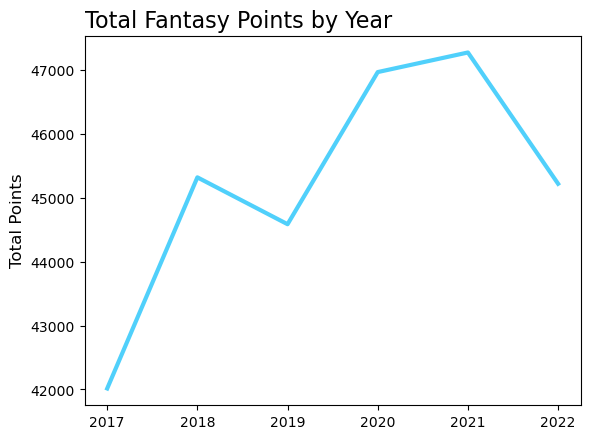

In [23]:
plt.plot(FantasyTotalPointsDF["Year"],
         FantasyTotalPointsDF["Total Fantasy Points"],
         linewidth = 3,
         color = blue)
plt.title(label = "Total Fantasy Points by Year",
          loc = "left",
          fontsize = 16)
plt.ylabel(ylabel = "Total Points",
           fontsize = 12)

5. Correlation between Total points scored and age of player.

In [25]:
MainDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [ ]:
# Create Summary Table for age and points


In [59]:
quartiles = MainDF["Age"].quantile([.25,.5,.75])
quartiles

0.25    24.0
0.50    25.0
0.75    28.0
Name: Age, dtype: float64

In [61]:
quartiles[.25]

24.0

In [64]:
NewMainDF = MainDF[(MainDF["Age"] >= quartiles[.25]) & 
                   (MainDF["Age"] <= quartiles[.75])]
NewMainDF

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
5,6,DeAndre Hopkins,HOU,WR,25,15,15,0,0,0,...,96,1378,14.35,13,1,1,309.8,HopkDe00,2.0,2017
6,7,Cam Newton,CAR,QB,28,16,16,291,492,3302,...,0,0,0.00,0,9,1,299.5,NewtCa00,2.0,2017
10,11,Melvin Gordon,LAC,RB,24,16,16,0,0,0,...,58,476,8.21,4,1,0,288.1,GordMe00,5.0,2017
11,12,Keenan Allen,LAC,WR,25,16,15,0,0,0,...,102,1393,13.66,6,1,0,284.2,AlleKe00,3.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,564,Kylin Hill,GNB,RB,24,2,0,0,0,0,...,0,0,0.00,0,0,0,0.7,HillKy00,158.0,2022
3377,567,Jacob Eason,CAR,QB,25,1,0,3,5,59,...,0,0,0.00,0,0,0,0.4,EasoJa00,78.0,2022
3382,572,Jordan Howard,NOR,RB,28,2,0,0,0,0,...,0,0,0.00,0,0,0,0.1,HowaJo00,162.0,2022
3384,574,KaVontae Turpin,DAL,WR,26,17,0,0,0,0,...,1,9,9.00,0,3,2,-0.4,TurpKa00,218.0,2022


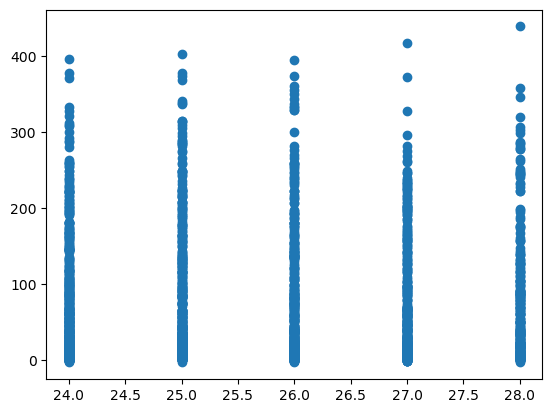

In [65]:
plt.scatter(x = NewMainDF["Age"],
            y = NewMainDF["PPR"])

In [53]:
MainDF2017["Age"].quantile([.25,.5,.75])

0.25    24.0
0.50    25.0
0.75    28.0
Name: Age, dtype: float64

In [45]:
MainDF2017 = MainDF[MainDF["Year"] == 2017]
MainDF2018 = MainDF[MainDF["Year"] == 2018]
MainDF2019 = MainDF[MainDF["Year"] == 2019]


MainDF2017.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [46]:
print(f"Min age is {MainDF2017['Age'].min()}")
print(f"Max age is {MainDF2017['Age'].max()}")
print(f"Ave age is {MainDF2017['Age'].mean()}")
print(f"Median age is {MainDF2017['Age'].median()}")

Min age is 21
Max age is 40
Ave age is 26.170093457943924
Median age is 25.0


In [49]:
print(f"Min age is {MainDF2019['Age'].min()}")
print(f"Max age is {MainDF2019['Age'].max()}")
print(f"Ave age is {MainDF2019['Age'].mean()}")
print(f"Median age is {MainDF2019['Age'].median()}")

Min age is 21
Max age is 42
Ave age is 26.059245960502693
Median age is 25.0


In [50]:
print(f"Min age is {MainDF2018['Age'].min()}")
print(f"Max age is {MainDF2018['Age'].max()}")
print(f"Ave age is {MainDF2018['Age'].mean()}")
print(f"Median age is {MainDF2018['Age'].median()}")

Min age is 21
Max age is 41
Ave age is 26.169398907103826
Median age is 25.0


In [41]:
print(f"Min age is {MainDF['Age'].min()}")
print(f"Max age is {MainDF['Age'].max()}")
print(f"Ave age is {MainDF['Age'].mean()}")
print(f"Median age is {MainDF['Age'].median()}")

#MainDF["Age"].median()
#MainDF["Age"].mean()

Min age is 21
Max age is 45
Ave age is 26.151711924439198
Median age is 25.0


In [32]:
MainDF["Age"].mean()

26.151711924439198

In [29]:
linregress(MainDF["Age"],MainDF["PPR"])

LinregressResult(slope=1.9993011156380098, intercept=27.82040217008295, rvalue=0.07854472037136719, pvalue=4.712388628803248e-06, stderr=0.43608780654984935, intercept_stderr=11.499096234433024)

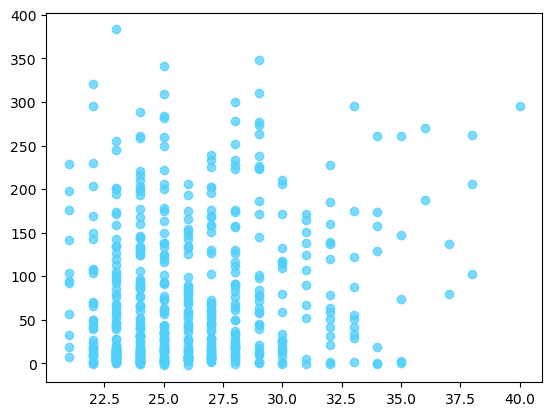

In [56]:
plt.scatter(x = MainDF2017["Age"],
            y = MainDF2017["PPR"],
            alpha = .75,
            color = blue)

In [77]:
AgeSeries2017 = MainDF2017.groupby(by = "Age").sum()["PPR"]
AgeSeries2017

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_8031/3995466944.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AgeSeries2017 = MainDF2017.groupby(by = "Age").sum()["PPR"]


Age
21    1149.5
22    2422.5
23    4456.0
24    6155.2
25    5522.8
26    3311.7
27    3825.5
28    3833.8
29    3788.0
30    1504.5
31    1072.2
32    1316.9
33     890.6
34     740.2
35     484.3
36     457.7
37     216.8
38     570.3
40     295.9
Name: PPR, dtype: float64

In [79]:
AgeSeries2017.index

Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 40],
           dtype='int64', name='Age')

In [81]:
AgeSeries2017["Age"]

KeyError: 'Age'

In [92]:
min(MainDF2017["Age"])

21

In [98]:
list(range(0,10,2))

[0, 2, 4, 6, 8]

In [ ]:
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))

In [109]:
np.arange(21,45,3)

array([21, 24, 27, 30, 33, 36, 39, 42])

Text(0, 0.5, 'Fantasy Points')

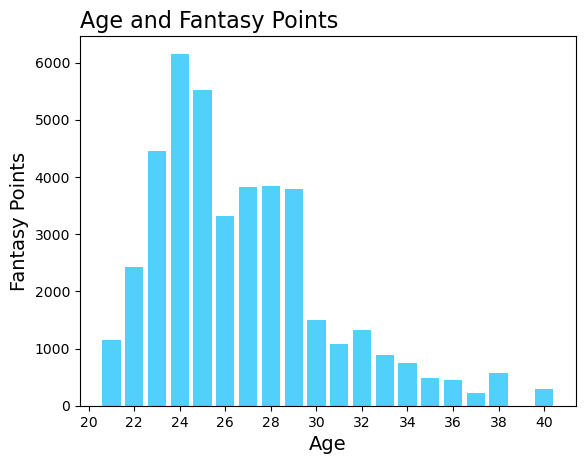

In [124]:
plt.bar(x = AgeSeries2017.index,
        height = list(AgeSeries2017),
        color = blue)
plt.title(label = "Age and Fantasy Points",
          loc = "left",
          fontsize = 16)
#plt.xlim(min(MainDF2017["Age"]) - 1, max(MainDF2017["Age"]) + 1)
plt.xticks(np.arange(min(MainDF2017["Age"]) - 1, max(MainDF2017["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)